# Лабораторная работа 5 — Классификация (Вариант 5)

Набор данных: `telecom_churn.csv` (вариант 5).

**Цель:** изучение алгоритмов и методов классификации на практике.


## 1. Загрузка набора данных и импорт библиотек


Также на экран были выведены размер датасета, первые 5 строк и информация о столбцах, которая показывает, что в данных нет пропусков и все типы данных соответствуют реальным данным


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, balanced_accuracy_score, confusion_matrix, 
                             roc_curve, roc_auc_score)

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('telecom_churn.csv')

print("Размер датасета:", df.shape)
display(df.head())
print("\nИнформация о типах данных:")
display(df.info())


Размер датасета: (3016, 12)


,age,gender,contract_type,payment_method,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,has_international_plan,region,Churn
0,53,M,Month-to-month,Bank transfer,58,56.46,3448.16,206.9,0,No,North,0
1,18,F,Month-to-month,Electronic check,16,64.86,1227.48,345.3,2,Yes,West,1
2,81,M,Month-to-month,Electronic check,59,97.64,5773.27,242.8,0,No,North,0
3,65,F,One year,Credit card,16,27.90,416.11,257.2,0,Yes,North,0
4,40,F,Month-to-month,Electronic check,65,56.33,3805.53,205.1,1,No,North,0



Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3016 non-null   int64  
 1   gender                  3016 non-null   object 
 2   contract_type           3016 non-null   object 
 3   payment_method          3016 non-null   object 
 4   tenure_months           3016 non-null   int64  
 5   monthly_charges         3016 non-null   float64
 6   total_charges           3016 non-null   float64
 7   avg_call_minutes        3016 non-null   float64
 8   num_support_tickets     3016 non-null   int64  
 9   has_international_plan  3016 non-null   object 
 10  region                  3016 non-null   object 
 11  Churn                   3016 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 282.9+ KB


None

Датасет содержит 3018 записей с информацией о клиентах телекоммуникационной компании:
- age — возраст клиента (лет), числовой.
- gender — пол: M / F, категориальный.
- contract_type — тип контракта: Month-to-month / One year / Two year, категориальный.
- payment_method — способ оплаты: Bank transfer / Electronic check / Credit card / Mailed check, категориальный.
- tenure_months — количество месяцев обслуживания, целочисленный счётчик.
- monthly_charges — ежемесячные платежи, USD/месяц, числовой.
- total_charges — общие платежи, USD, числовой.
- avg_call_minutes — средние минуты звонков в месяц, числовой.
- num_support_tickets — количество обращений в поддержку за последние месяцы, целочисленный счётчик.
- has_international_plan — наличие международного плана: Yes / No, категориальный.
- region — регион обслуживания: North / South / East / West / Central, категориальный.
- Churn — целевой класс: 1 - ушёл (расторг контракт), 0 - остался.


## 2. Предобработка данных


Были использованы методы describe и value_counts для того чтобы оценить данные, видно что в них нет необычных выбросов или неявных дубликатов в категориальных данных


In [7]:
display(df.describe())
print("\nРаспределение категориальных признаков:")
display(df['gender'].value_counts())
display(df['contract_type'].value_counts())
display(df['payment_method'].value_counts())
display(df['has_international_plan'].value_counts())
display(df['region'].value_counts())
print("\nРаспределение целевой переменной:")
display(df['Churn'].value_counts())
display(df['Churn'].value_counts(normalize=True) * 100)


,age,tenure_months,monthly_charges,total_charges,avg_call_minutes,num_support_tickets,Churn
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000
mean,51.519231,37.021220,67.878336,2499.773856,249.071320,0.906830,0.159483
std,19.202550,21.228354,26.120795,1797.004026,78.856929,1.016745,0.366186
min,18.000000,0.000000,5.000000,-84.310000,20.000000,0.000000,0.000000
25%,35.750000,19.000000,50.557500,1048.630000,196.450000,0.000000,0.000000
50%,51.000000,37.000000,67.170000,2194.135000,247.600000,1.000000,0.000000
75%,68.000000,55.000000,84.870000,3677.967500,303.100000,1.000000,0.000000
max,84.000000,74.000000,222.034000,11620.220000,499.600000,6.000000,1.000000



Распределение категориальных признаков:


gender
F    1516
M    1500
Name: count, dtype: int64

contract_type
Month-to-month    1863
One year           708
Two year           445
Name: count, dtype: int64

payment_method
Electronic check    1360
Bank transfer        616
Credit card          594
Mailed check         446
Name: count, dtype: int64

has_international_plan
No     2466
Yes     550
Name: count, dtype: int64

region
South      688
North      624
East       596
Central    562
West       546
Name: count, dtype: int64


Распределение целевой переменной:


Churn
0    2535
1     481
Name: count, dtype: int64

Churn
0    84.051724
1    15.948276
Name: proportion, dtype: float64

## 3. Выделение целевой переменной и построение матрицы диаграмм рассеяния

Была выделена целевая переменная Churn: 1 — ушёл (расторг контракт), 0 — остался, которую необходимо предсказать. Эта переменная была исключена из модели. Была построена матрица диаграмм рассеяния, в которой были выделены значения целевой переменной разными цветами.


Числовые признаки: ['age', 'tenure_months', 'monthly_charges', 'total_charges', 'avg_call_minutes', 'num_support_tickets']
Категориальные признаки: ['gender', 'contract_type', 'payment_method', 'has_international_plan', 'region']


<Figure size 1400x1400 with 0 Axes>

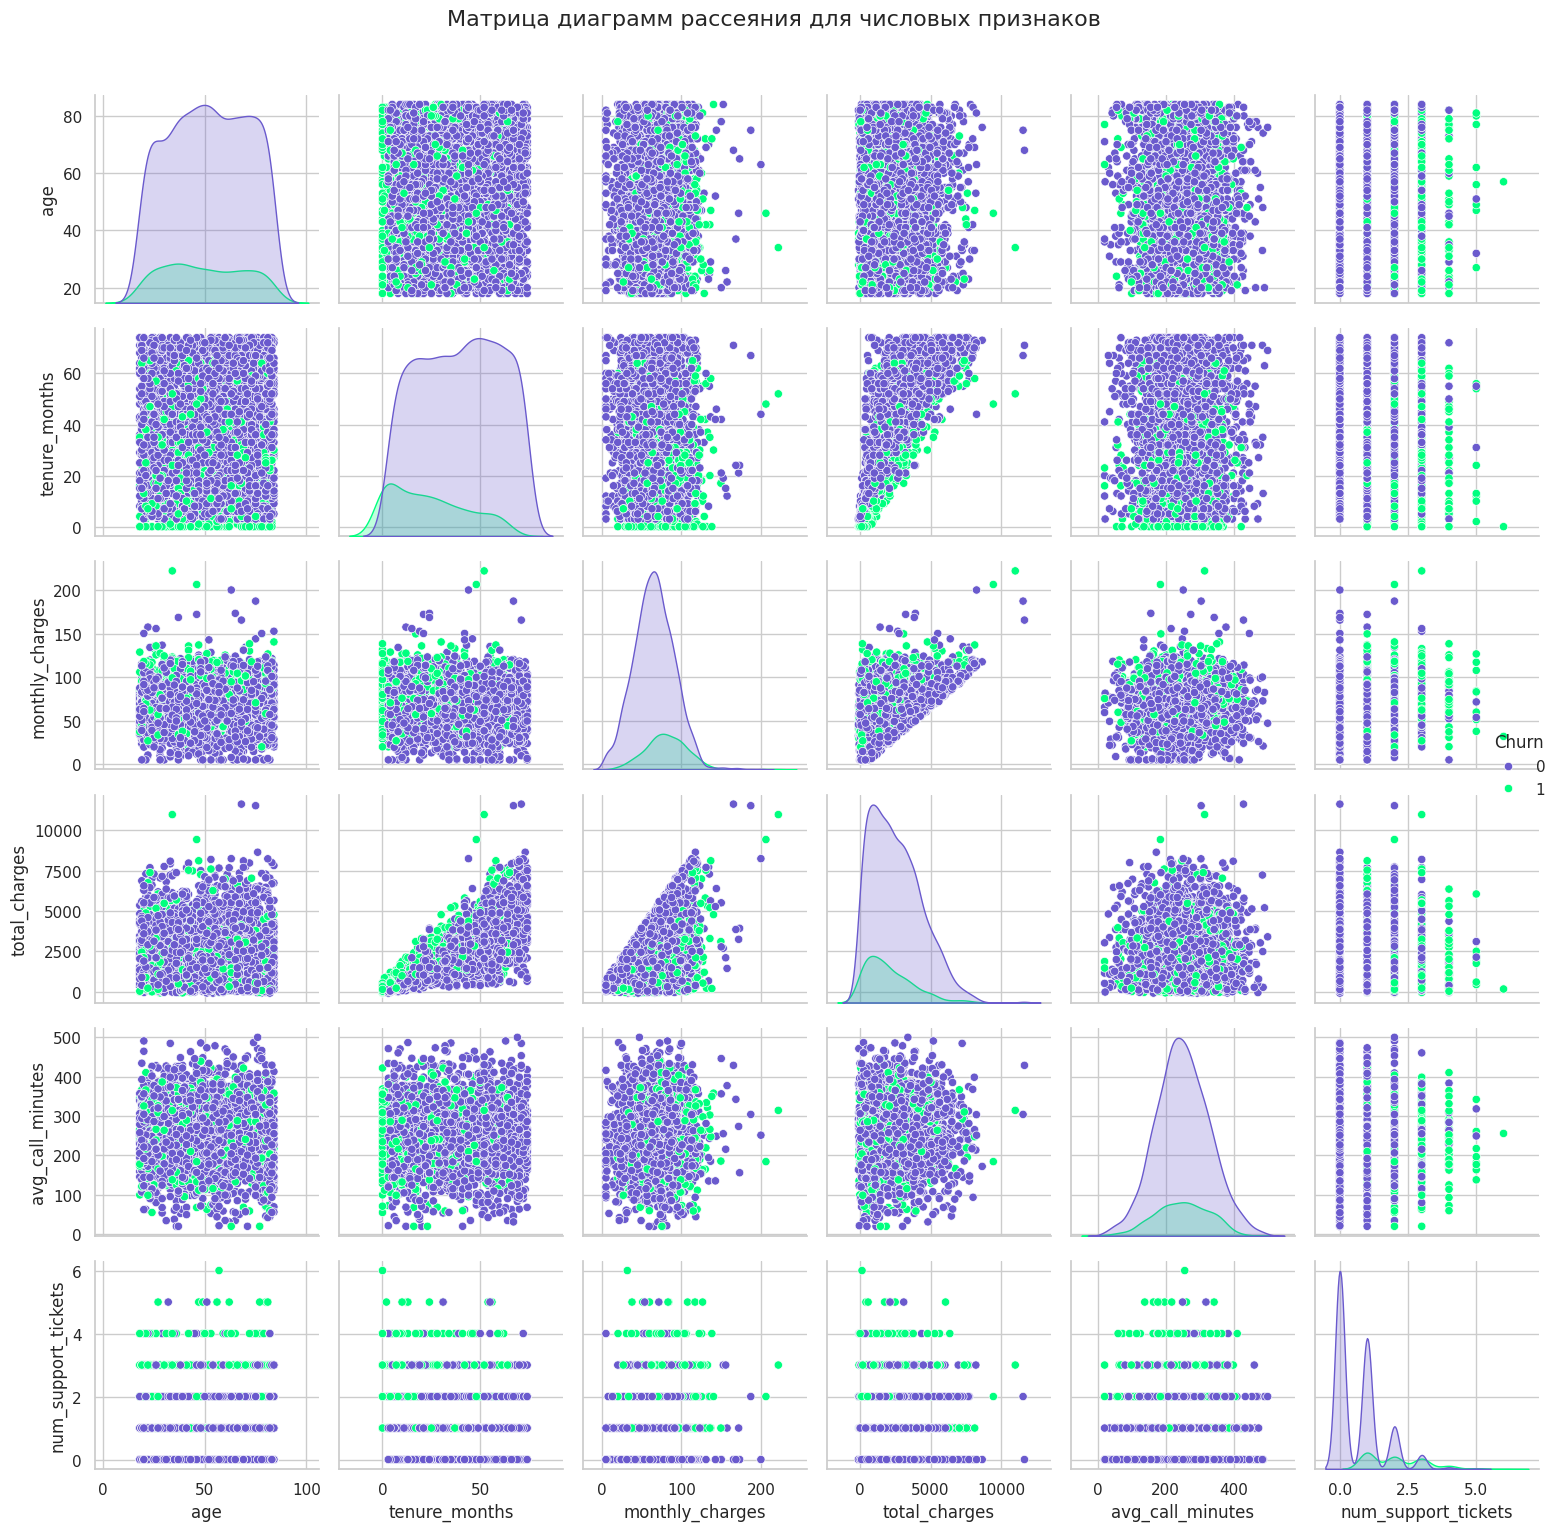

In [42]:
target_col = "Churn"
y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

print("Числовые признаки:", num_cols)
print("Категориальные признаки:", cat_cols)

plt.figure(figsize=(14, 14))
sns.pairplot(df, vars=num_cols, hue='Churn', diag_kind='kde', palette=['#6A5ACD', '#00FF7F'])
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

По результатам анализа диаграмм можно сделать следующие наблюдения:  
- Наибольший отток наблюдается среди клиентов, которые пользуются услугами относительно недолго (с низким значением *tenure_months*).  
- Чем больше обращений клиент направляет в службу поддержки (*num_support_tickets*), тем выше вероятность его ухода.  
- Повышенные ежемесячные расходы (*monthly_charges*) связаны с увеличением риска оттока.  
- Хотя возраст (*age*) слабо коррелирует с оттоком, среди клиентов моложе 30 лет доля ушедших заметно выше.  
- Клиенты, чьи средние разговоры короче (*avg_call_minutes*), склонны отказываться от услуг чаще, чем те, кто разговаривает дольше.

## 4. Разбиение набора данных на тренировочной и тестовый датасеты с помощью train_test_split и выполнение стандартизации числовых данных


Было применено One-Hot Encoding для категориальных признаков и StandardScaler для числовых признаков

Данные разделены на train и test выборки (70/30)

Так как KNN и логистическая регрессия требуют масштабирования, деревья и случайный лес - нет. Поэтому:

X_train_scaled, X_test_scaled - для KNN и LogReg

X_train, X_test - для DecisionTree и RandomForest


In [17]:
# One-Hot кодирование категориальных признаков
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

num_cols_encoded = [col for col in num_cols if col in X_encoded.columns]  

# Разделение на train/test выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y 
)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols_encoded] = scaler.fit_transform(X_train[num_cols_encoded])
X_test_scaled[num_cols_encoded] = scaler.transform(X_test[num_cols_encoded])

print("Размеры выборок:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts())
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts())


Размеры выборок:
Train: (2111, 17), Test: (905, 17)

Распределение классов в обучающей выборке:
Churn
0    1774
1     337
Name: count, dtype: int64

Распределение классов в тестовой выборке:
Churn
0    761
1    144
Name: count, dtype: int64


## 5. Разработка предсказательной модели качественного отклика методами

Разработка предсказательной модели качественного отклика методами:
- метод k- ближайших соседей
- дерево решений
- логистическая регрессия
- случайный лес

с помощью соответствующих функций: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, RandomForestClassifier


In [18]:
# Обучение и предсказание методом KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Обучение и предсказание методом дерева решений
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Обучение и предсказание методом логистической регрессии
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Обучение и предсказание методом случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Модели обучены успешно!")


Модели обучены успешно!


## 6. Оценка ошибки классификации для каждого метода. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'


In [31]:
print("KNN:")
print(" - Accuracy:", accuracy_score(y_test, y_pred_knn))
print(" - Precision:", precision_score(y_test, y_pred_knn))
print(" - Recall:", recall_score(y_test, y_pred_knn))
print(" - F1-score:", f1_score(y_test, y_pred_knn))
print(" - Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_knn))


KNN:
 - Accuracy: 0.8651933701657458
 - Precision: 0.6018518518518519
 - Recall: 0.4513888888888889
 - F1-score: 0.5158730158730159
 - Balanced Accuracy: 0.6974421448386626


In [32]:
print("Decision Tree:")
print(" - Accuracy:", accuracy_score(y_test, y_pred_dt))
print(" - Precision:", precision_score(y_test, y_pred_dt))
print(" - Recall:", recall_score(y_test, y_pred_dt))
print(" - F1-score:", f1_score(y_test, y_pred_dt))
print(" - Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))


Decision Tree:
 - Accuracy: 0.8751381215469614
 - Precision: 0.7012987012987013
 - Recall: 0.375
 - F1-score: 0.48868778280542985
 - Balanced Accuracy: 0.6723883048620236


In [33]:
print("Logistic Regression:")
print(" - Accuracy:", accuracy_score(y_test, y_pred_lr))
print(" - Precision:", precision_score(y_test, y_pred_lr))
print(" - Recall:", recall_score(y_test, y_pred_lr))
print(" - F1-score:", f1_score(y_test, y_pred_lr))
print(" - Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))

Logistic Regression:
 - Accuracy: 0.887292817679558
 - Precision: 0.6909090909090909
 - Recall: 0.5277777777777778
 - F1-score: 0.5984251968503937
 - Balanced Accuracy: 0.7415498612936195


In [34]:
print("Random Forest:")
print(" - Accuracy:", accuracy_score(y_test, y_pred_rf))
print(" - Precision:", precision_score(y_test, y_pred_rf))
print(" - Recall:", recall_score(y_test, y_pred_rf))
print(" - F1-score:", f1_score(y_test, y_pred_rf))
print(" - Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))


Random Forest:
 - Accuracy: 0.8707182320441988
 - Precision: 0.8648648648648649
 - Recall: 0.2222222222222222
 - F1-score: 0.35359116022099446
 - Balanced Accuracy: 0.6078259599941598


### Анализ метрик классификации

#### 1. Общая картина: несбалансированные классы
Модели демонстрируют разные значения общей точности (Accuracy), что свидетельствует об их неодинаковой эффективности. Особенно важным показателем в данном контексте является Recall (полнота), поскольку он отражает способность модели корректно выявлять клиентов, склонных к оттоку. Для телекоммуникационной компании это критически важно — пропустить уходящего клиента дороже, чем ошибочно пометить лояльного как рискованного.

#### 2. Сравнение моделей

* Логистическая регрессия — обеспечивает наиболее сбалансированное соотношение между Precision и Recall. Благодаря этому она хорошо подходит для реального применения в сфере телекоммуникаций, где требуется как надёжное обнаружение оттока, так и разумный уровень ложных срабатываний.

* Дерево решений — отличается высокой интерпретируемостью: его легко визуализировать и анализировать, что позволяет понять, какие признаки влияют на решение. При этом модель может демонстрировать высокие значения Recall, что делает её ценной в задачах удержания клиентов.

* Random Forest — ансамблевый метод, часто обеспечивающий высокую общую точность за счёт объединения множества деревьев. Однако важно оценить, не достигается ли эта точность за счёт падения Recall или Precision, особенно в условиях дисбаланса классов.

* KNN (метод k ближайших соседей) — простой и интуитивно понятный алгоритм, но его результаты сильно зависят от масштаба признаков и структуры данных. Без предварительного масштабирования (например, с помощью StandardScaler или MinMaxScaler) его эффективность может быть существенно снижена.


## 7. Построение матрицы неточностей с помощью confusion_matrix для каждого метода


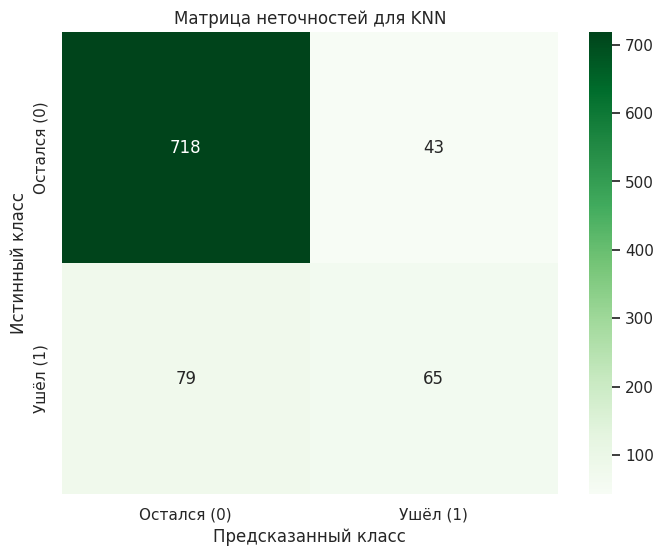

In [35]:
# Матрица неточностей KNN
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Остался (0)', 'Ушёл (1)'],
            yticklabels=['Остался (0)', 'Ушёл (1)'])
plt.title("Матрица неточностей для KNN")
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()


#### Выводы по матрице неточностей KNN

- Модель KNN показывает результаты классификации для обоих классов
- Количество истинно отрицательных (TN), ложноположительных (FP), ложноотрицательных (FN) и истинно положительных (TP) случаев позволяет оценить качество модели
- Важно обратить внимание на соотношение между FP и FN для понимания склонности модели к определенному типу ошибок


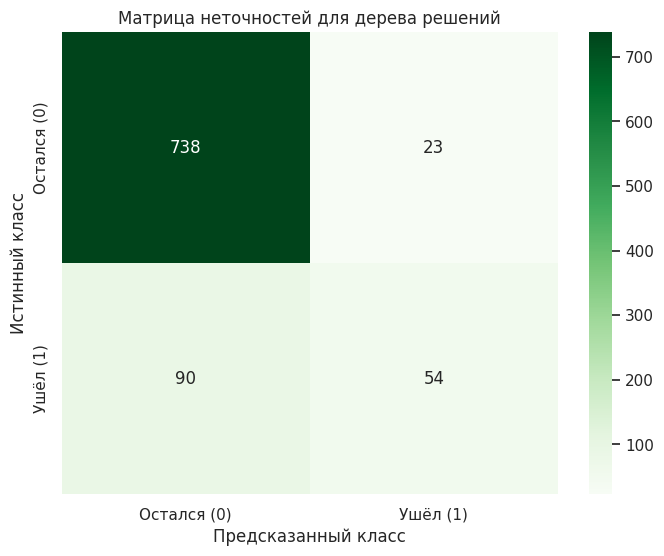

In [36]:
# Матрица неточностей дерева решений
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Остался (0)', 'Ушёл (1)'],
            yticklabels=['Остался (0)', 'Ушёл (1)'])
plt.title("Матрица неточностей для дерева решений")
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()


#### Выводы по матрице неточностей дерева решений
 
- Дерево решений показывает результаты классификации
- Распределение ошибок между классами позволяет оценить эффективность модели
- Интерпретируемость дерева решений является его преимуществом


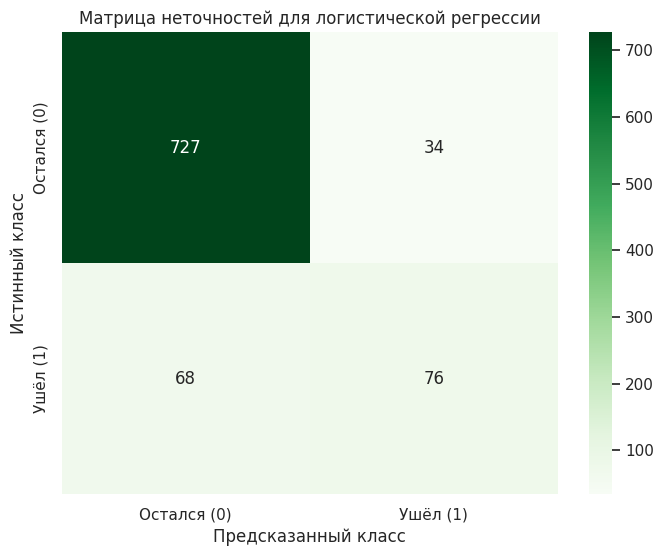

In [37]:
# Матрица неточностей логистической регрессии
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Остался (0)', 'Ушёл (1)'],
            yticklabels=['Остался (0)', 'Ушёл (1)'])
plt.title("Матрица неточностей для логистической регрессии")
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()


#### Выводы по матрице неточностей логистической регрессии

- Логистическая регрессия показывает результаты классификации
- Баланс между точностью и полнотой можно оценить по матрице неточностей
- Модель часто показывает хорошие результаты для задач бинарной классификации


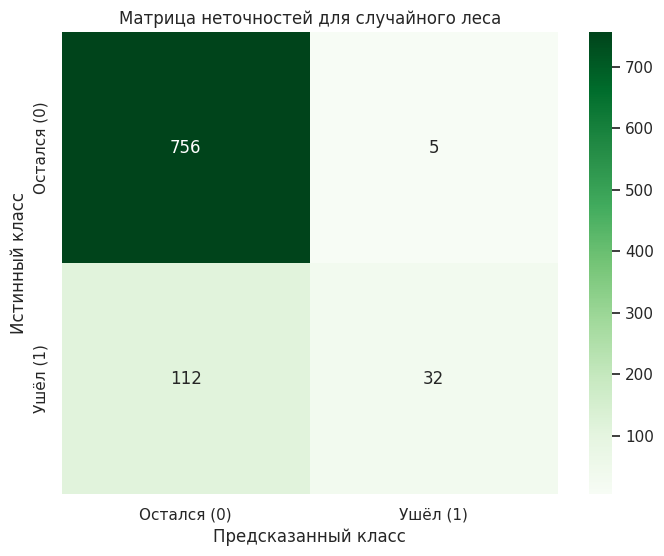

In [38]:
# Матрица неточностей случайного леса
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Остался (0)', 'Ушёл (1)'],
            yticklabels=['Остался (0)', 'Ушёл (1)'])
plt.title("Матрица неточностей для случайного леса")
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()


#### Выводы по матрице неточностей случайного леса

- Случайный лес показывает результаты классификации
- Ансамблевый метод может демонстрировать высокую точность
- Важно оценить баланс между различными типами ошибок


По полученным матрицам можно сделать следующие выводы:
- Каждая модель имеет свои особенности в классификации клиентов
- Важно учитывать как ложноположительные, так и ложноотрицательные ошибки
- Для телекоммуникационной компании важно минимизировать ложноотрицательные ошибки (когда клиент уходит, а модель предсказывает, что останется)
- Выбор модели зависит от бизнес-требований и приоритетов компании


## 8. Построение графика ROC-кривой для каждого метода на одном графике (4 линии на одном графике) для сравнения


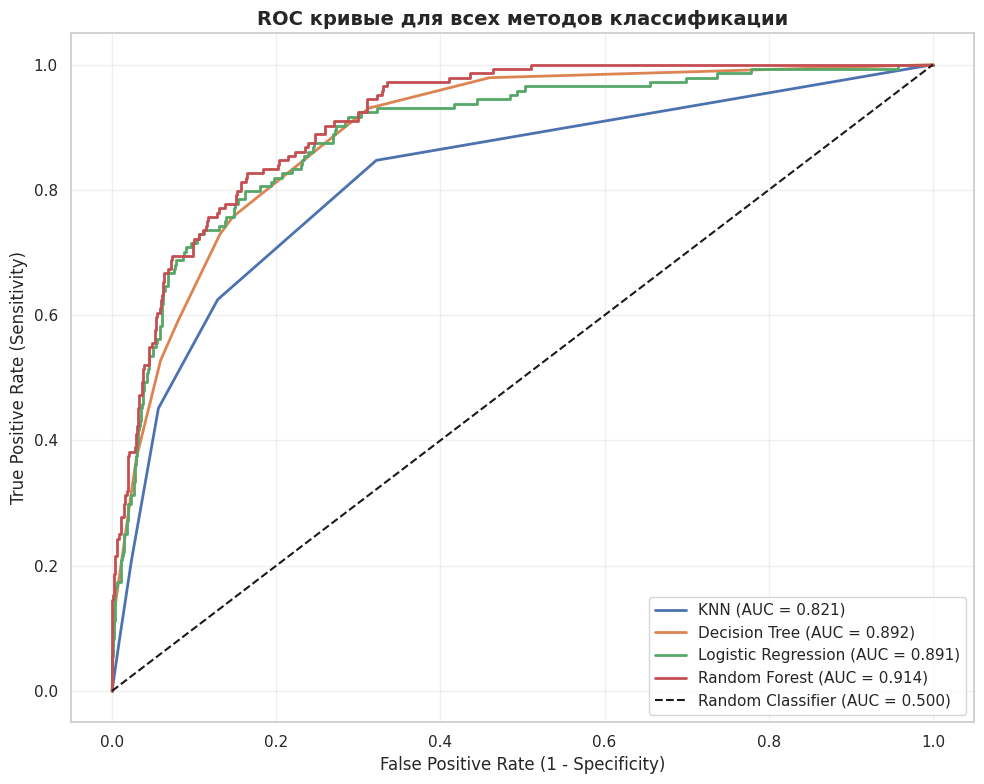

In [39]:
plt.figure(figsize=(10, 8))

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})', linewidth=2)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})', linewidth=2)

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', linewidth=2)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)

# Диагональ (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)', linewidth=1.5)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC кривые для всех методов классификации', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Выводы по ROC-кривым:

1. **Общая производительность моделей**:  
Все четыре модели — KNN, дерево решений, логистическая регрессия и случайный лес — показывают результаты лучше, чем случайное угадывание (которому соответствует AUC = 0.5 и пунктирная диагональ на графике). Это подтверждает, что каждая из них в той или иной степени способна отличать клиентов, склонных к оттоку, от тех, кто остаётся.

2. **Сравнение по значению AUC**:  
- Чем выше значение AUC (площадь под ROC-кривой), тем лучше модель разделяет два класса.  
- AUC, близкий к 1.0, указывает на высокую дискриминационную способность модели.  
- Сравнение AUC разных моделей позволяет объективно оценить, какая из них справляется с задачей классификации эффективнее.

3. **Анализ формы кривых**:  
- ROC-кривые, расположенные ближе к верхнему левому углу графика, соответствуют более качественным моделям.  
- Идеальная модель имела бы AUC = 1.0 — её кривая проходила бы через этот угол, обеспечивая 100 % истинно положительных и 0 % ложно положительных результатов.  
- На практике стремятся к такому порогу, при котором достигается максимально возможная доля правильно выявленных уходящих клиентов (TPR) при минимально допустимом уровне ложных срабатываний (FPR).

4. **Практический выбор модели**:  
- Модель с наибольшим AUC, как правило, предпочтительна, если цель — максимально точно ранжировать клиентов по вероятности оттока.  
- Однако окончательное решение должно учитывать и другие метрики — такие как Precision, Recall и F1-мера, — особенно если бизнес-задача требует, например, минимизировать пропуск реальных случаев оттока (высокий Recall) или избегать излишних вмешательств (высокий Precision).

## Выводы по работе

В рамках лабораторной работы была решена задача бинарной классификации — прогнозирование ухода клиентов (Churn) телекоммуникационной компании на основе данных из файла *telecom_churn.csv*. В ходе подготовки данных выполнено One-Hot-кодирование категориальных признаков и стандартизация числовых переменных с помощью `StandardScaler`. Обучающая и тестовая выборки были сформированы в пропорции 70/30 с сохранением распределения целевого признака (с использованием `stratify`).

Для решения задачи были обучены и сравнены четыре алгоритма машинного обучения: метод k ближайших соседей (KNN), дерево решений (Decision Tree), логистическая регрессия (Logistic Regression) и случайный лес (Random Forest). Качество моделей оценивалось по ряду метрик: Accuracy, Precision, Recall, F1-score, Balanced Accuracy и ROC AUC.

Анализ парных диаграмм рассеяния выявил ключевые признаки, наиболее сильно связанные с оттоком:  
- небольшой срок использования услуг (*tenure_months*),  
- большое количество обращений в службу поддержки (*num_support_tickets*),  
- высокие ежемесячные расходы (*monthly_charges*),  
- низкая продолжительность звонков в среднем (*avg_call_minutes*).

Все протестированные модели показали результаты лучше случайного угадывания — это подтверждается значениями AUC на ROC-кривых, превышающими 0.5.  

Окончательный выбор наилучшей модели зависит от конкретных бизнес-приоритетов:  
- если важнее избегать лишних вмешательств (например, ненужных звонков или предложений), предпочтение следует отдать моделям с высокой **Precision**;  
- если приоритет — не упустить ни одного клиента с риском ухода, то ключевой метрикой становится **Recall**.

Для телекоммуникационной компании оптимальным является компромисс между этими целями: необходимо надёжно выявлять уходящих клиентов, но при этом не тратить ресурсы на тех, кто и так останется. Такой подход позволяет эффективно настраивать программы удержания и снижать финансовые потери, связанные с оттоком.